In [1]:
# import dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Read csv into pandas df
file_path = Path('Myopia.csv')
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df["MYOPIC"].nunique()

2

In [4]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [5]:
#Remove the "myopic" column from the dataset
df = df.drop('MYOPIC', axis=1)
# Save the cleaned dataframe as a new csv file
file_path = Path('cleaned_myopia.csv')
df.to_csv(file_path, index=False)

In [6]:
#Standardize your dataset so that columns that contain larger values do not influence 
# the outcome more than columns with smaller values

# Create a scaler to standardize
scaler = StandardScaler()

# Train the scaler
X_scaled = scaler.fit_transform(df)

In [7]:
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# Apply Dimensionality Reduction

In [8]:
#Perform dimensionality reduction with PCA. How did the number of the features change?
# Initialize PCA model and preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)

# Get the principle components of the x train scaled
myopia_pca = pca.fit_transform(X_scaled)

# Get the variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [9]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results

# To do this, run t-SNE on the principal components, which is the output of the PCA transformation
#Initialize the t-SNE model
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)
#Dimension reduction
tsne_features = tsne.fit_transform(myopia_pca)

/Users/fanniepolcari/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.005s...
[t-SNE] Computed neighbors for 618 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.329575
[t-SNE] KL divergence after 2500 iterations: 2.115245


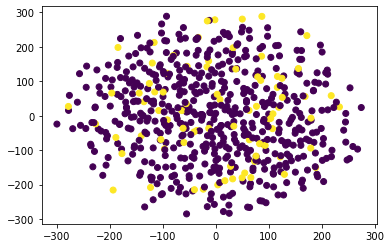

In [10]:
#Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

# Perform a cluster analysis with K-means

In [11]:
# Create an elbow plot to identify the best number of clusters. Make sure to do the following:

#Use a for loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

#If possible, determine where the elbow of the plot is, and at which value of k it appears
elbow_data = {"k": k, "inertia": inertia}
elbowDF = pd.DataFrame(elbow_data)
elbowDF.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


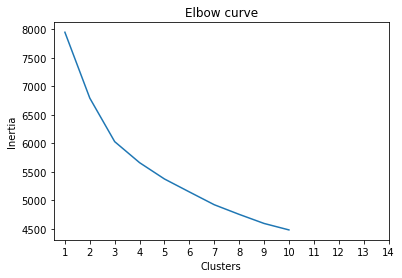

In [12]:
# Create a plot to examine any elbows that exist
plt.plot(elbowDF['k'], elbowDF['inertia'])
plt.xticks(range(1,15))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [16]:
# Create a DataFrame from transformed data for K-Means modelling and plotting
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
PCA_df = pd.DataFrame(myopia_pca, columns=columns)
PCA_df['class']= km.labels_
PCA_df.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


/Users/fanniepolcari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/fanniepolcari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


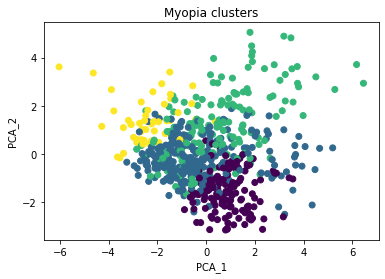

In [17]:
#Initialize the K-Means model with n clusters
model = KMeans(n_clusters=4, random_state=0)

#Train the model
model.fit(PCA_df)

#Predict clusters
predictions = model.predict(PCA_df)

#Add cluster labels to DF
PCA_df['class'] = model.labels_
#plot the clusters
plt.scatter(x=PCA_df[1], y=PCA_df[2], c=PCA_df['class'])
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('Myopia clusters')
plt.show()

# Make recommendation

In [18]:
#Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor
#Can the patients be clustered? If so, into how many clusters?
#It seems the optimal number of clusters is 4, the t-SNE did not help in finding the clusters.
#It also seems that the dateset is not large enough to accurately made predictions.
#I'd recommend starting with more data and then trying to test and train.